In [23]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import sys

sys.path.append("..")

import GanUtils as utils
import GaussianMixtureUtils as GMutils

sys.path.append("../DiscriminativeNN")


import DiscGaussianMixture5Layers as disc

sys.path.append("../GenerativeNN")

import GenGaussianMixture5Layers as gen

manualSeed = random.randint(1, 10000) # fix seed
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

%matplotlib inline

Random Seed:  3311


# WGAN  .div(max value).mul(c)

In [29]:
batchSize = 64
nz = 10
nc = 2 # Number of outputs
ndf = 100
ngf = 100
niter = 100
nElements = 1000
lr = 0.00005
beta1 = 0.5
n_critic = 5 # Training more the discriminator

c = 0.1 # clip

In [30]:
netG = torch.nn.Sequential(
    torch.nn.Linear(nz, ngf),
    torch.nn.ReLU(),
    torch.nn.Linear(ngf, nc),
    torch.nn.Tanh()
)


netD = torch.nn.Sequential(
    torch.nn.Linear(nc, ndf),
    torch.nn.ReLU(),
    torch.nn.Linear(ndf, 1)
)

In [31]:
optimizerG = optim.RMSprop(netG.parameters(), lr = lr)
optimizerD = optim.RMSprop(netD.parameters(), lr = lr)

In [32]:
# Might mistake here
input = torch.FloatTensor(batchSize, 2)
noise = torch.FloatTensor(batchSize, nz)

input = Variable(input)
noise = Variable(noise)

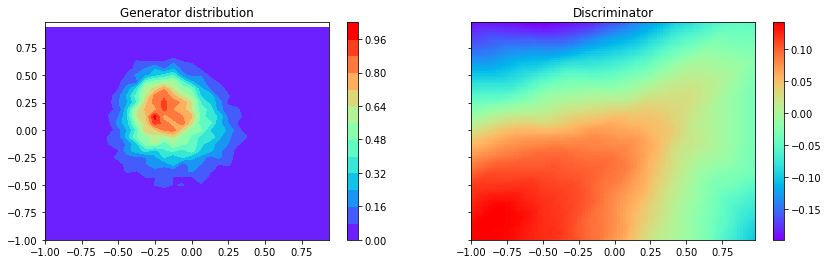

[1/100][999/1000] Loss_D: -0.00898085 Loss_G: -0.1253 D(G(z)): 0.1250


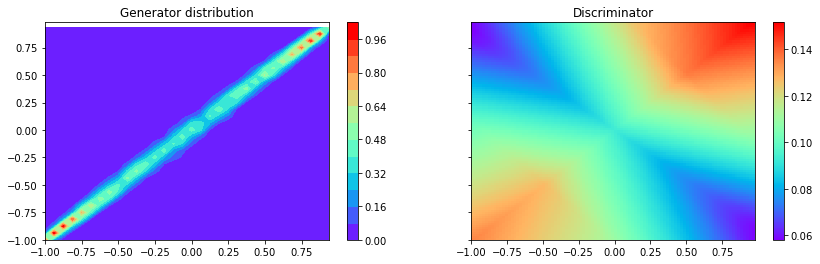

[2/100][999/1000] Loss_D: -0.00989433 Loss_G: -0.1023 D(G(z)): 0.1023


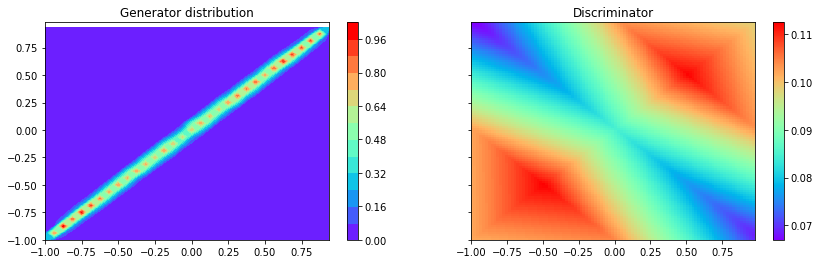

[3/100][999/1000] Loss_D: -0.01004206 Loss_G: -0.0859 D(G(z)): 0.0859


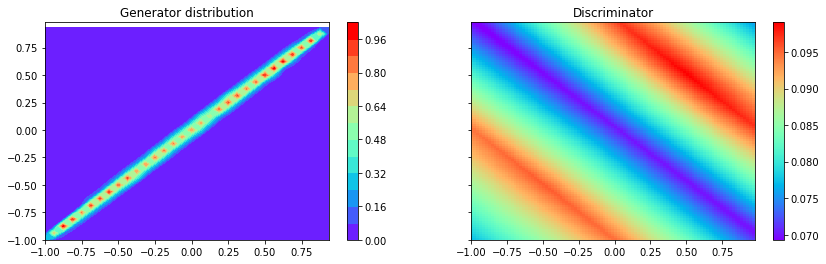

[4/100][999/1000] Loss_D: -0.01330052 Loss_G: -0.0736 D(G(z)): 0.0735


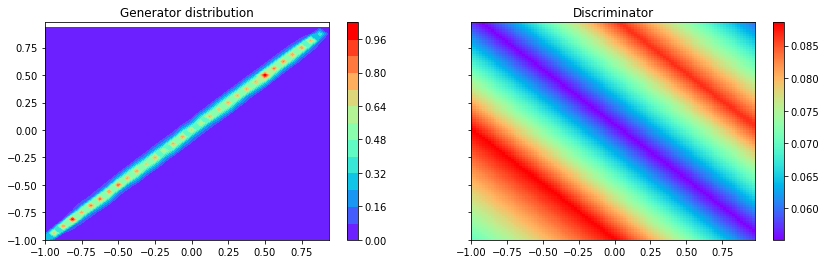

[5/100][999/1000] Loss_D: -0.01294655 Loss_G: -0.0725 D(G(z)): 0.0724


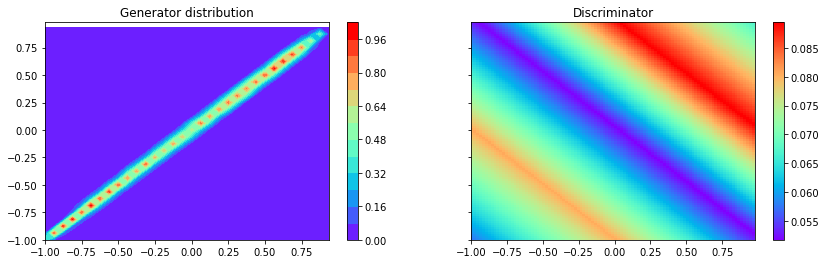

[6/100][999/1000] Loss_D: -0.01079822 Loss_G: -0.0725 D(G(z)): 0.0724


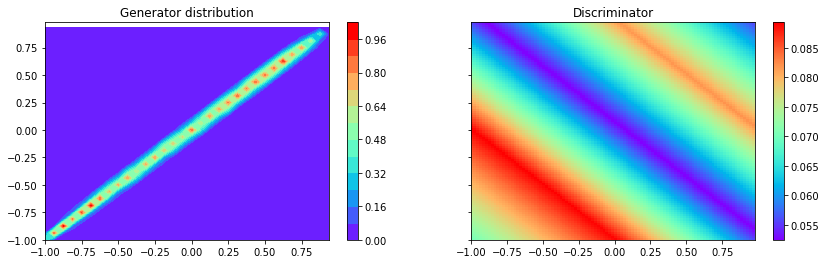

[7/100][999/1000] Loss_D: -0.01256640 Loss_G: -0.0750 D(G(z)): 0.0749


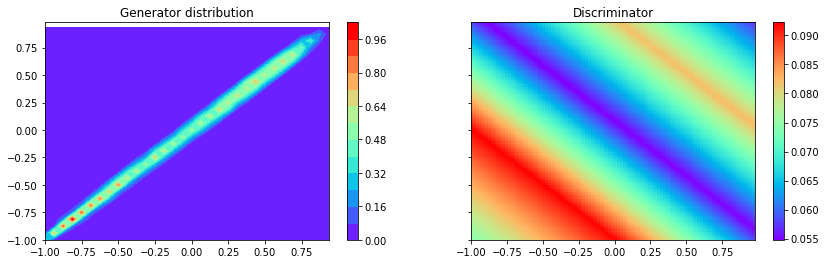

[8/100][999/1000] Loss_D: -0.01132437 Loss_G: -0.0728 D(G(z)): 0.0727


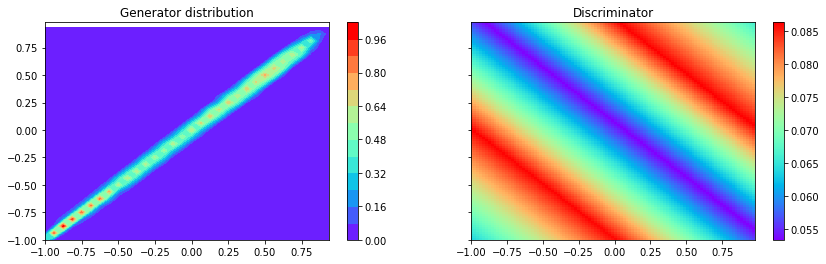

[9/100][999/1000] Loss_D: -0.01159117 Loss_G: -0.0699 D(G(z)): 0.0699


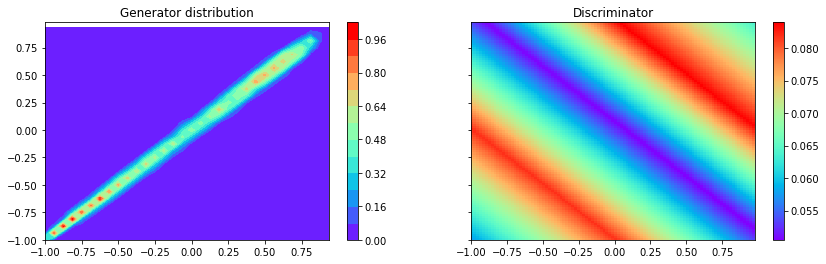

[10/100][999/1000] Loss_D: -0.01309163 Loss_G: -0.0675 D(G(z)): 0.0675


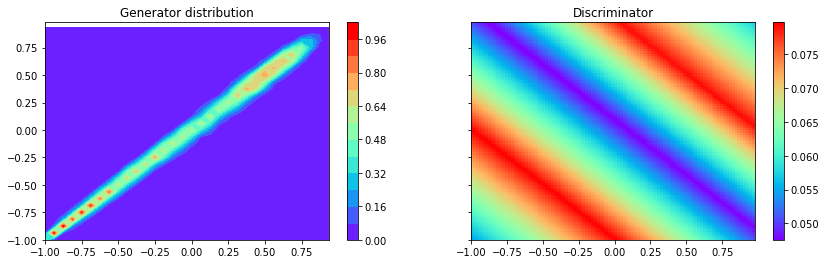

[11/100][999/1000] Loss_D: -0.01414933 Loss_G: -0.0535 D(G(z)): 0.0534


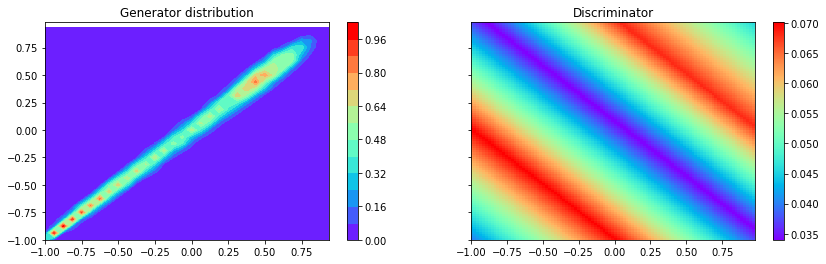

[12/100][999/1000] Loss_D: -0.02032648 Loss_G: -0.0395 D(G(z)): 0.0393


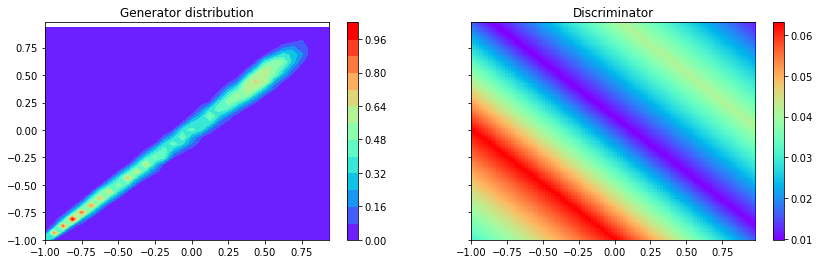

[13/100][999/1000] Loss_D: -0.01499645 Loss_G: -0.0301 D(G(z)): 0.0299


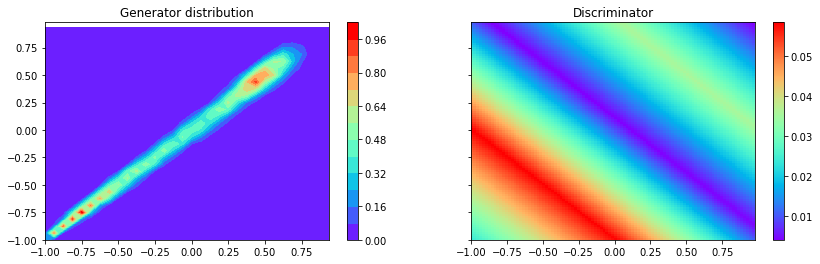

[14/100][999/1000] Loss_D: -0.01575442 Loss_G: -0.0333 D(G(z)): 0.0332


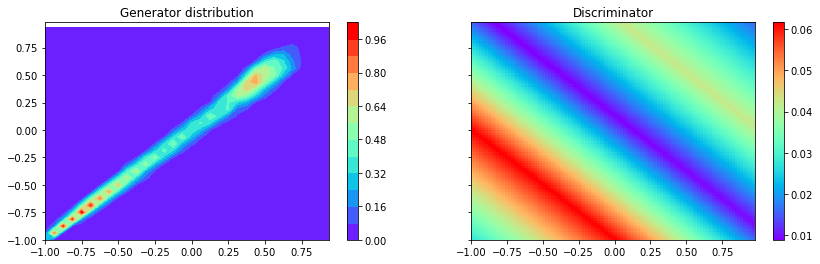

[15/100][999/1000] Loss_D: -0.01309397 Loss_G: -0.0418 D(G(z)): 0.0416


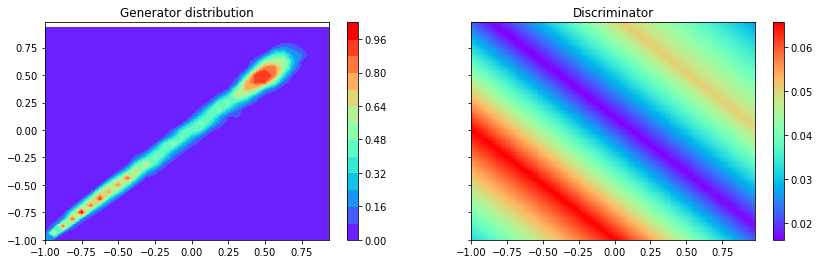

[16/100][999/1000] Loss_D: -0.01058413 Loss_G: -0.0464 D(G(z)): 0.0463


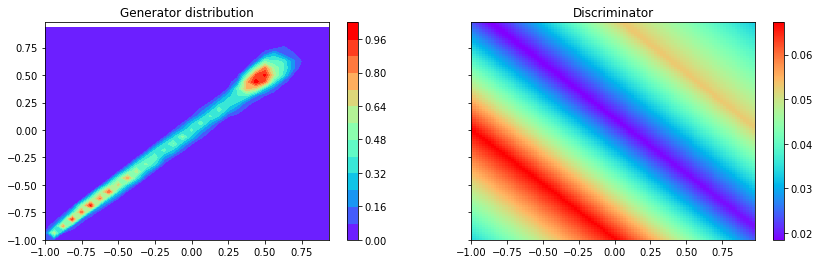

[17/100][999/1000] Loss_D: -0.01489346 Loss_G: -0.0500 D(G(z)): 0.0498


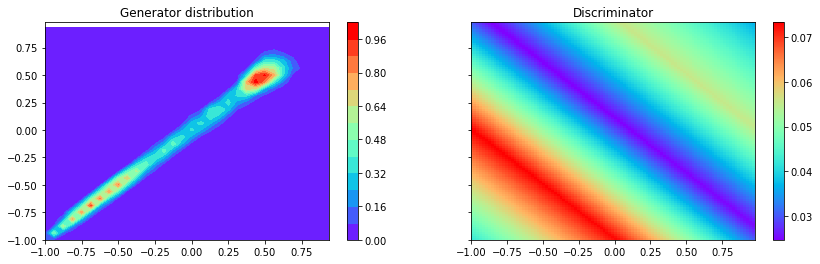

[18/100][999/1000] Loss_D: -0.01640296 Loss_G: -0.0547 D(G(z)): 0.0546


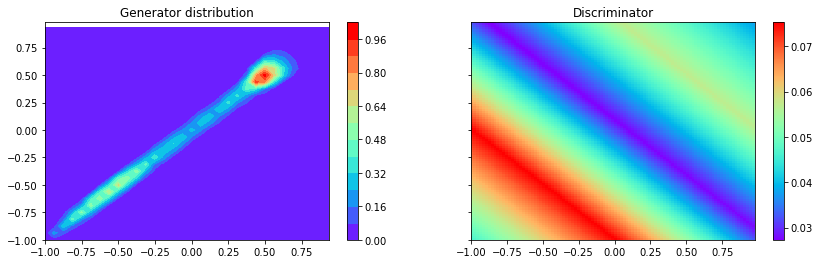

[19/100][999/1000] Loss_D: -0.00812345 Loss_G: -0.0622 D(G(z)): 0.0621


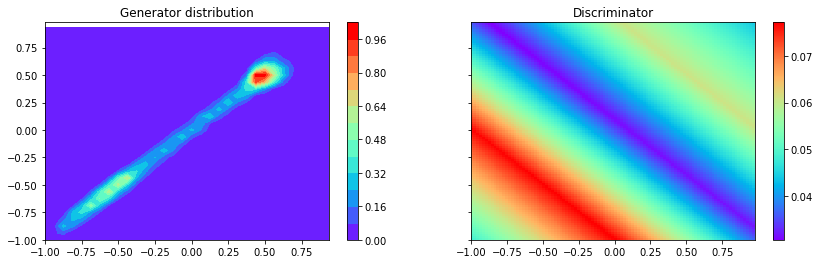

[20/100][999/1000] Loss_D: -0.00931805 Loss_G: -0.0685 D(G(z)): 0.0684


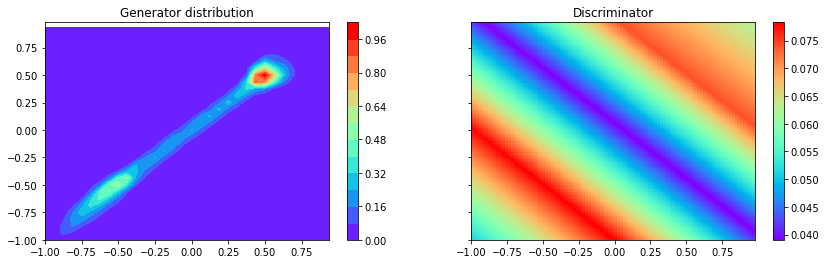

[21/100][999/1000] Loss_D: -0.00973724 Loss_G: -0.0709 D(G(z)): 0.0708


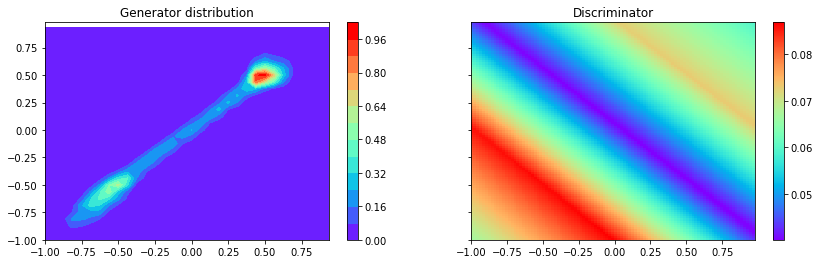

[22/100][999/1000] Loss_D: -0.00932022 Loss_G: -0.0755 D(G(z)): 0.0754


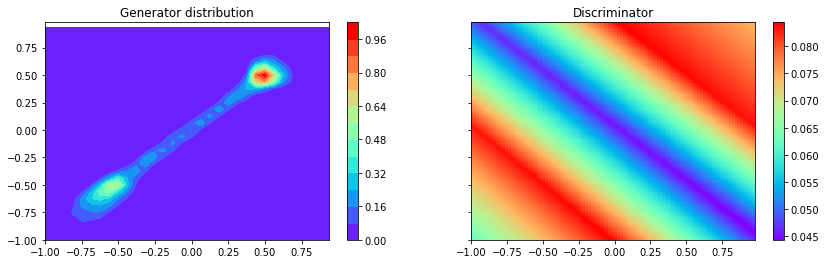

[23/100][999/1000] Loss_D: -0.00576397 Loss_G: -0.0799 D(G(z)): 0.0798


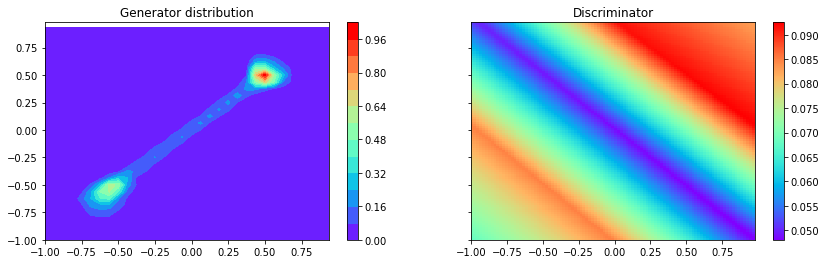

[24/100][999/1000] Loss_D: -0.00795593 Loss_G: -0.0880 D(G(z)): 0.0879


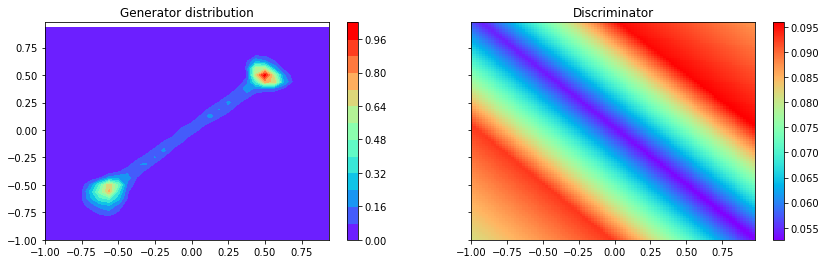

[25/100][999/1000] Loss_D: -0.00627884 Loss_G: -0.0930 D(G(z)): 0.0929


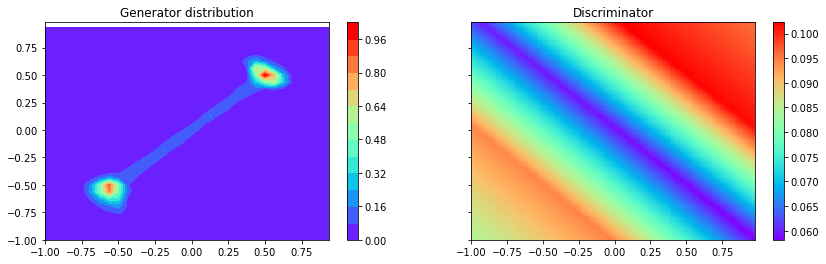

[26/100][999/1000] Loss_D: -0.00627420 Loss_G: -0.0978 D(G(z)): 0.0978


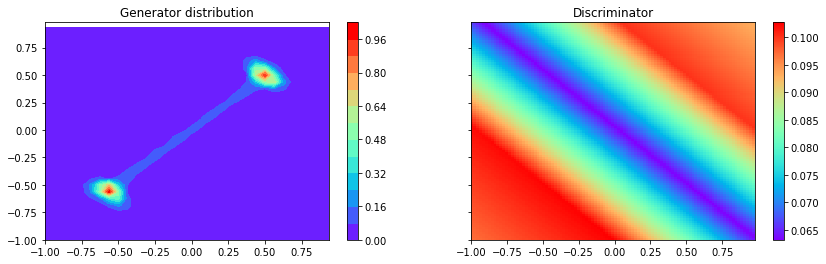

[27/100][999/1000] Loss_D: -0.00457793 Loss_G: -0.0980 D(G(z)): 0.0979


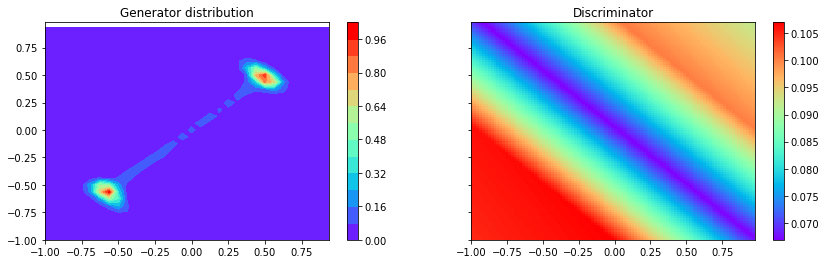

[28/100][999/1000] Loss_D: -0.00213041 Loss_G: -0.0990 D(G(z)): 0.0989


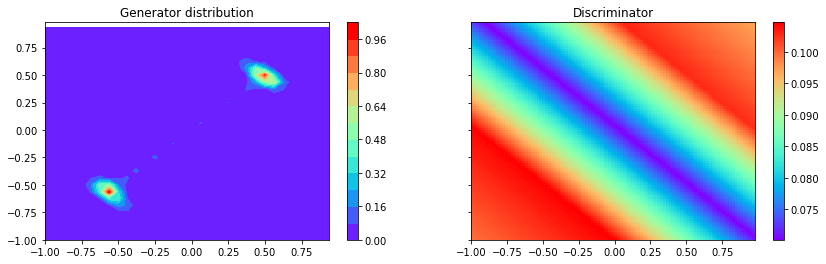

[29/100][999/1000] Loss_D: -0.00430021 Loss_G: -0.1012 D(G(z)): 0.1011


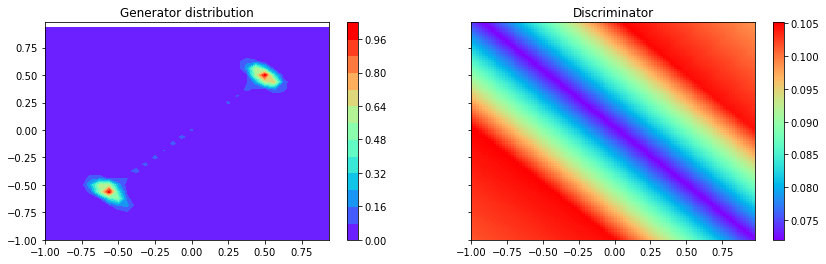

[30/100][999/1000] Loss_D: -0.00306407 Loss_G: -0.1011 D(G(z)): 0.1010


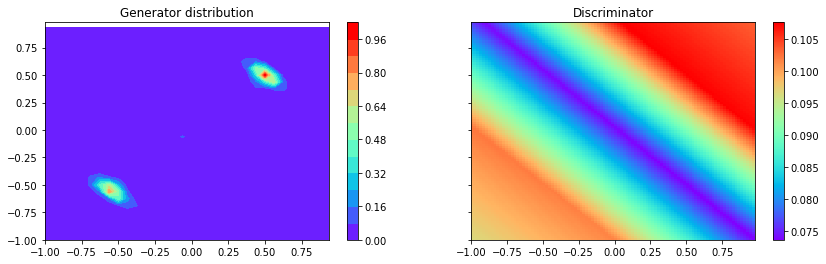

KeyboardInterrupt: 

In [33]:
for epoch in range(1, niter + 1):
    GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)
    for i in range(nElements):
        ############################
        # (1) Update D network
        ###########################
        # train with real
        for t in range(n_critic):
            netD.zero_grad()
            
            ## Real 
            real_cpu = GMutils.sample(batchSize)
            batch_size = real_cpu.size(0)
            input.data.resize_(real_cpu.size()).copy_(real_cpu)
            
            output_real = netD(input)
            
            ## Fake
            noise.data.resize_(batch_size, nz)
            noise.data.normal_(0, 1)
            fake = netG(noise).detach()
            
            output_fake = netD(fake)
            
            errD = - torch.mean(output_real) + torch.mean(output_fake)
            errD.backward()
            optimizerD.step()
                        
            # Clip
            for p in netD.parameters():
                p.data.div_(p.data.abs().max()).mul_(c)
                
        ############################
        # (2) Update G network
        ###########################
        
        netG.zero_grad()
        noise.data.normal_(0, 1)
        fake = netG(noise)
        output = netD(fake)
        errG = - torch.mean(output) - output.data.var()
        errG.backward()
        
        D_G_z2 = output.data.mean()
        
        optimizerG.step()
        
    print('[%d/%d][%d/%d] Loss_D: %.8f Loss_G: %.4f D(G(z)): %.4f'
              % (epoch, niter, i, nElements,
                 errD.data.sum(), errG.data[0], D_G_z2))
            
GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)

# WGAN  - mu / sigma * c

In [44]:
batchSize = 64
nz = 10
nc = 2 # Number of outputs
ndf = 100
ngf = 100
niter = 100
nElements = 1000
lr = 0.00005
beta1 = 0.5
n_critic = 5 # Training more the discriminator

c = 0.1 # clip

In [53]:
netG = torch.nn.Sequential(
    torch.nn.Linear(nz, ngf),
    torch.nn.ReLU(),
    torch.nn.Linear(ngf, nc),
    torch.nn.Tanh()
)


netD = torch.nn.Sequential(
    torch.nn.Linear(nc, ndf),
    torch.nn.ReLU(),
    torch.nn.Linear(ndf, 1)
)

In [54]:
optimizerG = optim.RMSprop(netG.parameters(), lr = lr)
optimizerD = optim.RMSprop(netD.parameters(), lr = lr)

In [55]:
# Might mistake here
input = torch.FloatTensor(batchSize, 2)
noise = torch.FloatTensor(batchSize, nz)

input = Variable(input)
noise = Variable(noise)

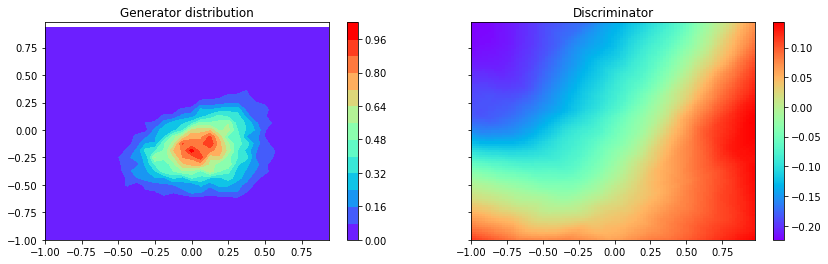

[1/100][999/1000] Loss_D: -0.03971626 Loss_G: -0.1230 D(G(z)): 0.1092


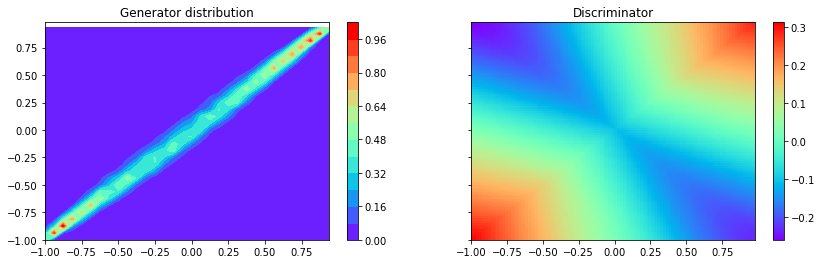

[2/100][999/1000] Loss_D: -0.05769595 Loss_G: 0.1400 D(G(z)): -0.1415


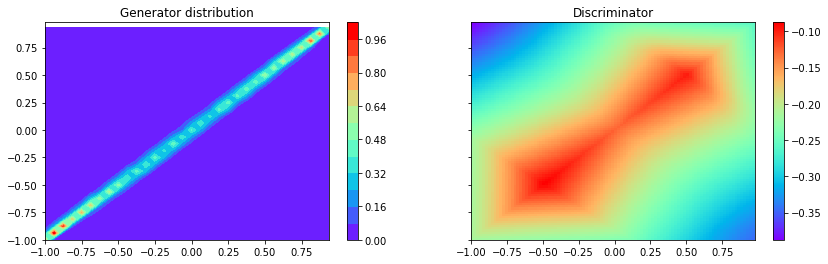

[3/100][999/1000] Loss_D: -0.03408905 Loss_G: 0.0643 D(G(z)): -0.0656


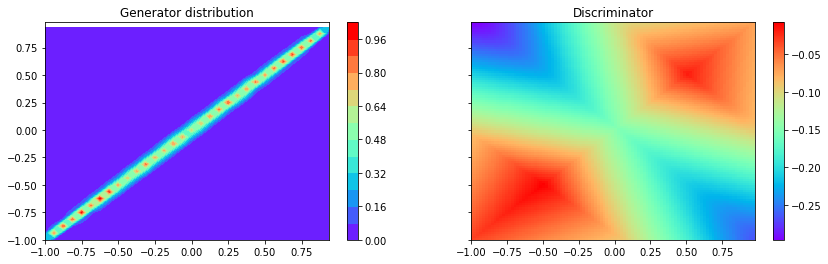

[4/100][999/1000] Loss_D: -0.05041970 Loss_G: 0.1867 D(G(z)): -0.1881


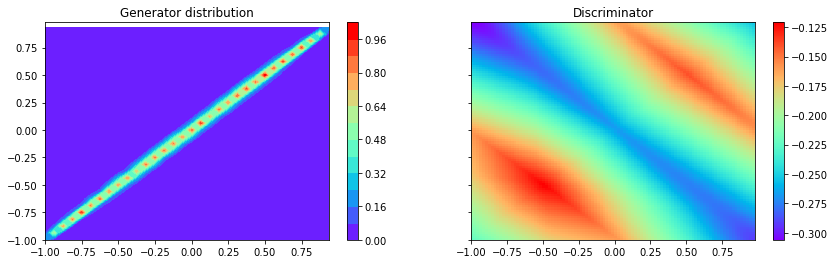

[5/100][999/1000] Loss_D: -0.06291179 Loss_G: 0.2276 D(G(z)): -0.2298


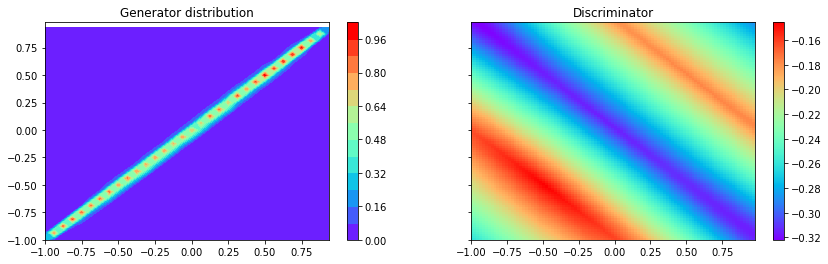

[6/100][999/1000] Loss_D: -0.06978443 Loss_G: 0.2404 D(G(z)): -0.2425


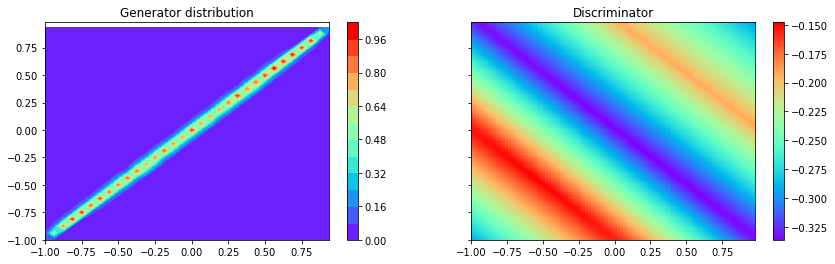

[7/100][999/1000] Loss_D: -0.08067261 Loss_G: 0.2463 D(G(z)): -0.2489


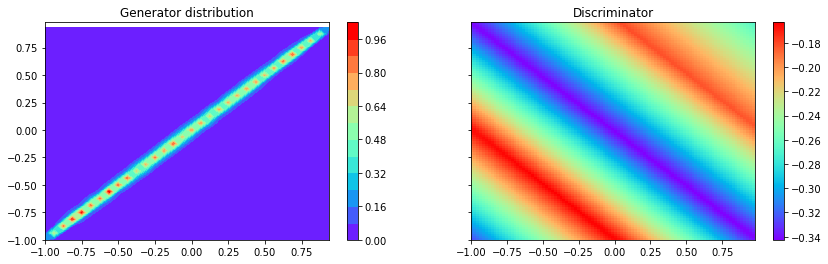

[8/100][999/1000] Loss_D: -0.07444617 Loss_G: 0.2397 D(G(z)): -0.2420


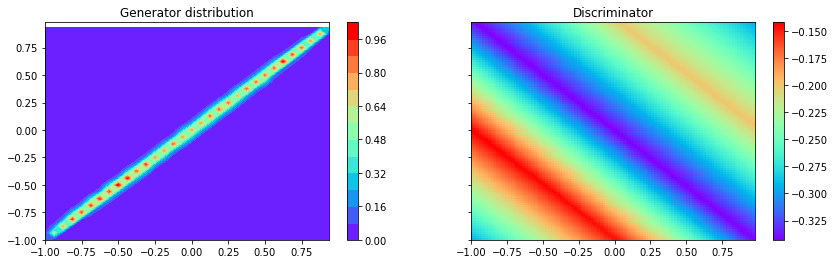

[9/100][999/1000] Loss_D: -0.07314043 Loss_G: 0.2323 D(G(z)): -0.2349


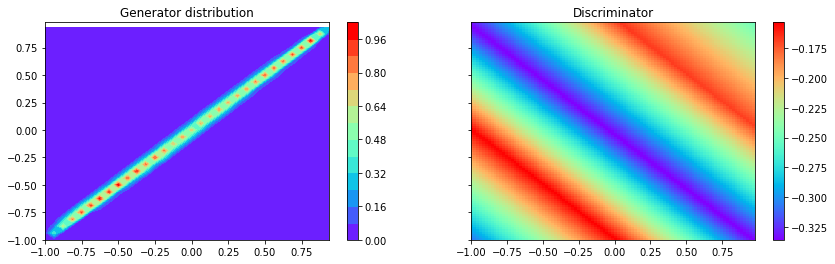

[10/100][999/1000] Loss_D: -0.06461315 Loss_G: 0.2295 D(G(z)): -0.2315


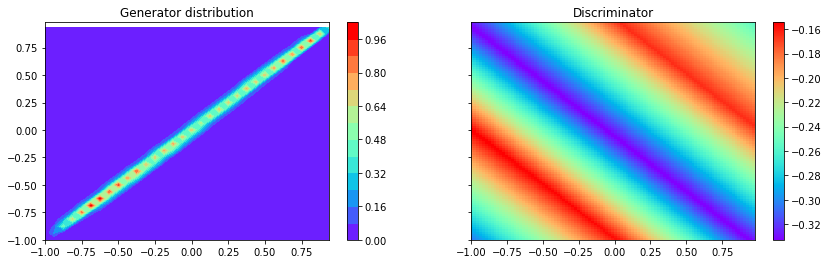

[11/100][999/1000] Loss_D: -0.05974913 Loss_G: 0.2322 D(G(z)): -0.2350


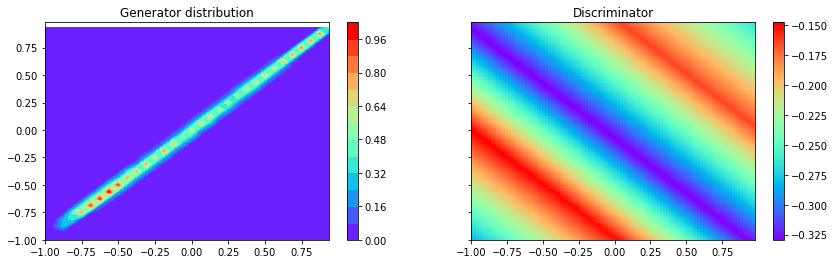

[12/100][999/1000] Loss_D: -0.06561807 Loss_G: 0.2188 D(G(z)): -0.2208


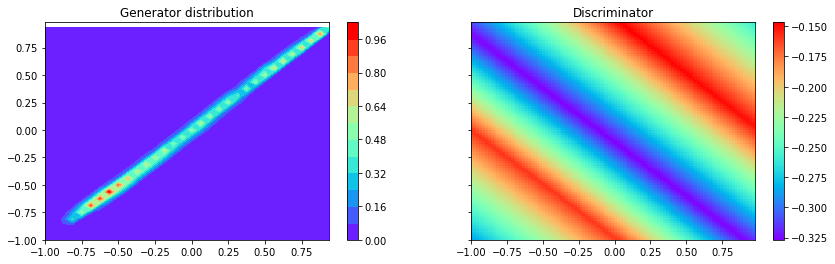

[13/100][999/1000] Loss_D: -0.07536735 Loss_G: 0.2045 D(G(z)): -0.2066


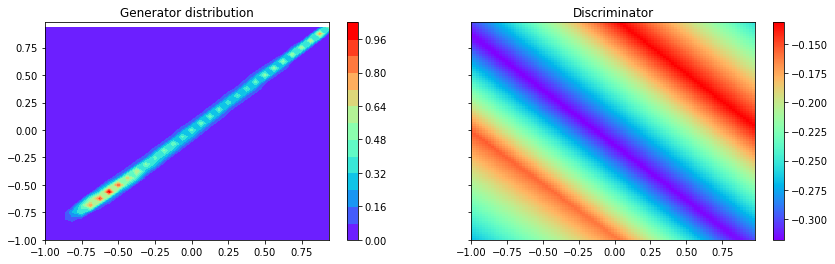

[14/100][999/1000] Loss_D: -0.05910502 Loss_G: 0.2002 D(G(z)): -0.2028


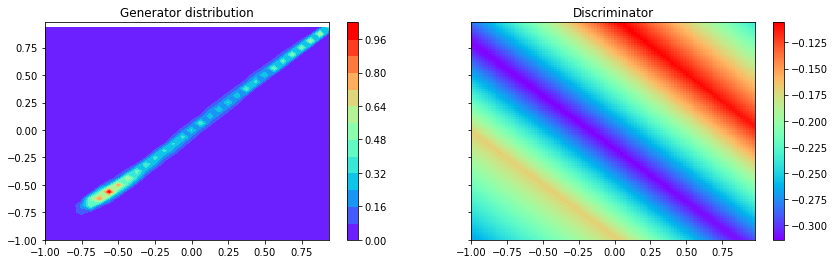

[15/100][999/1000] Loss_D: -0.07170807 Loss_G: 0.1913 D(G(z)): -0.1934


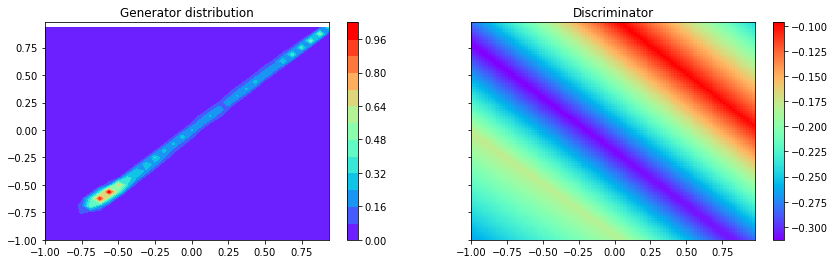

[16/100][999/1000] Loss_D: -0.06952582 Loss_G: 0.1867 D(G(z)): -0.1887


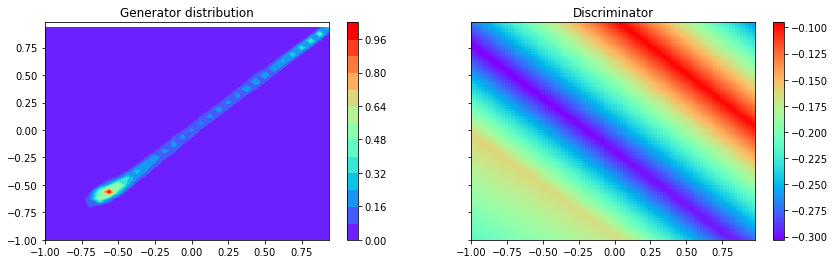

[17/100][999/1000] Loss_D: -0.06425162 Loss_G: 0.1976 D(G(z)): -0.2000


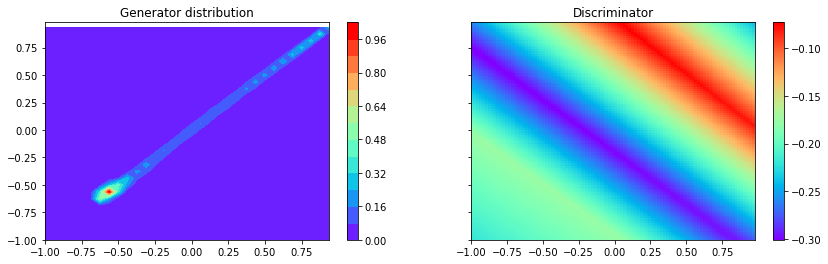

[18/100][999/1000] Loss_D: -0.07116038 Loss_G: 0.1660 D(G(z)): -0.1691


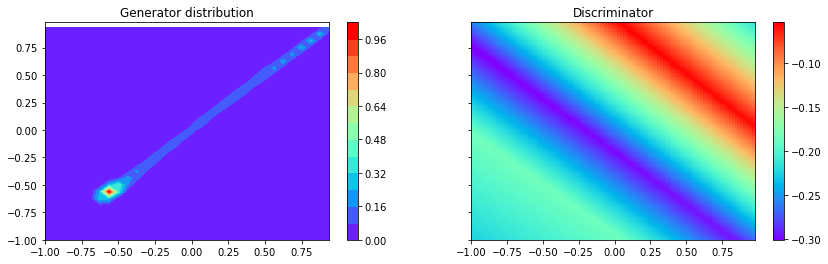

[19/100][999/1000] Loss_D: -0.05560096 Loss_G: 0.1571 D(G(z)): -0.1591


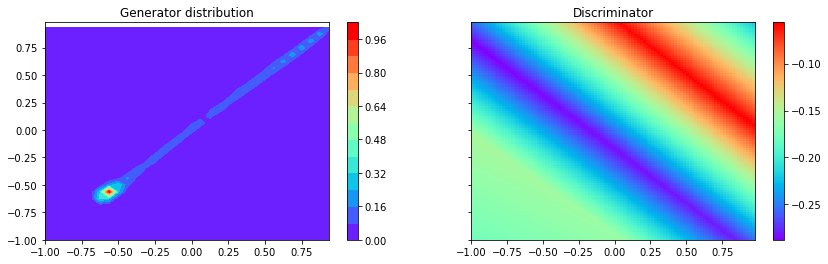

[20/100][999/1000] Loss_D: -0.05648056 Loss_G: 0.1475 D(G(z)): -0.1498


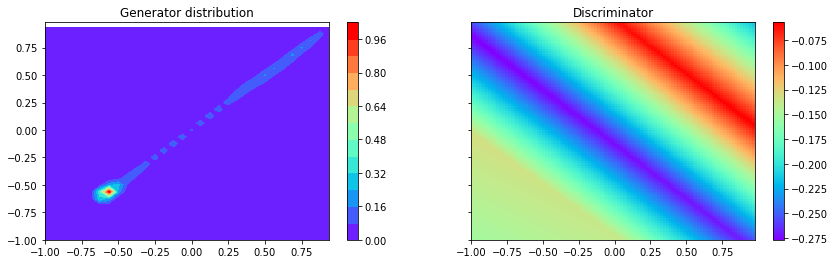

[21/100][999/1000] Loss_D: -0.04935333 Loss_G: 0.1260 D(G(z)): -0.1278


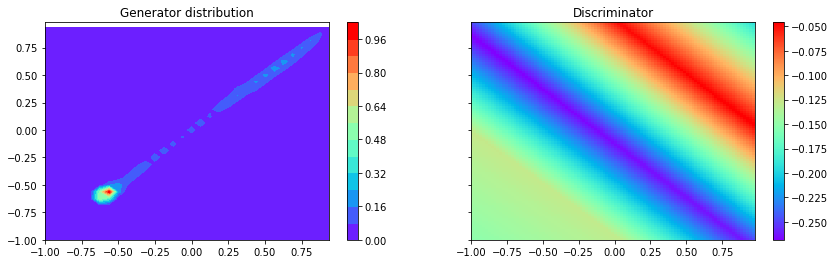

[22/100][999/1000] Loss_D: -0.04120815 Loss_G: 0.1243 D(G(z)): -0.1266


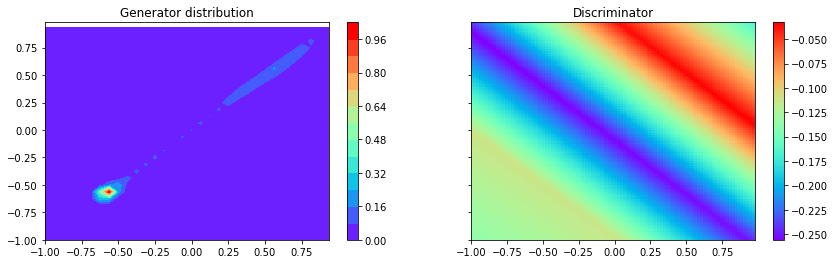

[23/100][999/1000] Loss_D: -0.04316697 Loss_G: 0.0982 D(G(z)): -0.1004


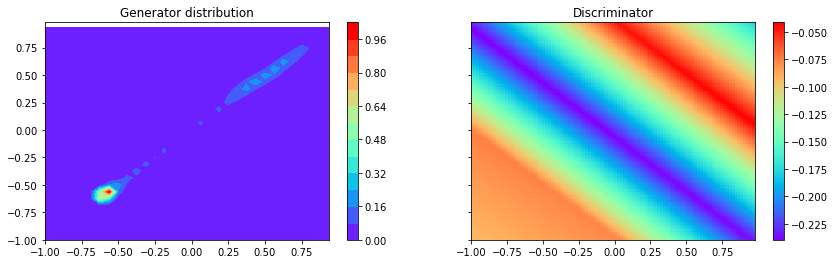

[24/100][999/1000] Loss_D: -0.04368658 Loss_G: 0.0822 D(G(z)): -0.0846


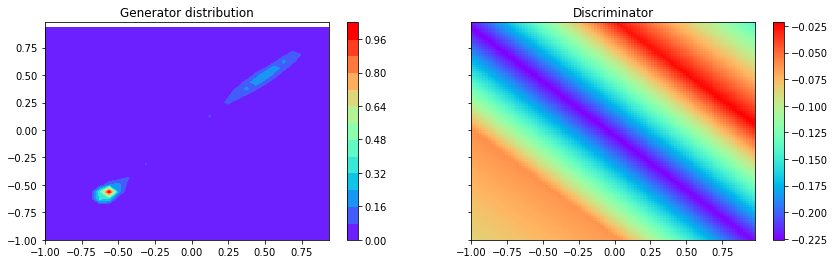

[25/100][999/1000] Loss_D: -0.02968676 Loss_G: 0.0663 D(G(z)): -0.0691


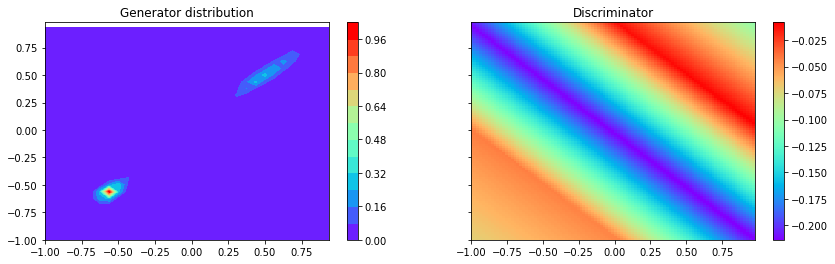

[26/100][999/1000] Loss_D: -0.03449776 Loss_G: 0.0478 D(G(z)): -0.0503


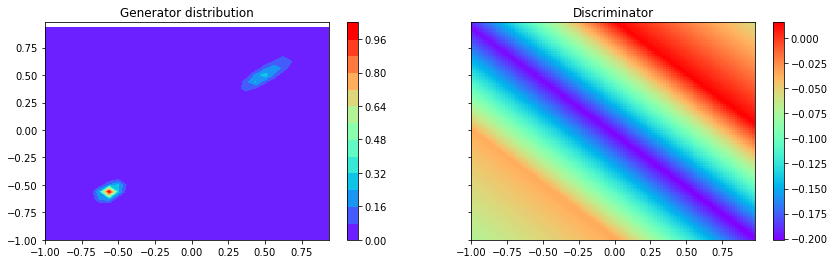

[27/100][999/1000] Loss_D: -0.03301868 Loss_G: 0.0249 D(G(z)): -0.0268


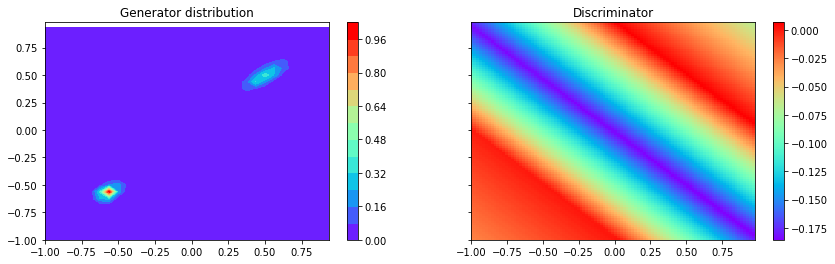

[28/100][999/1000] Loss_D: -0.03502405 Loss_G: 0.0038 D(G(z)): -0.0061


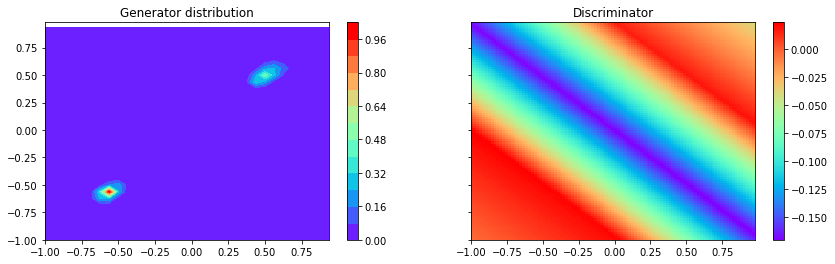

[29/100][999/1000] Loss_D: -0.01951871 Loss_G: -0.0128 D(G(z)): 0.0106


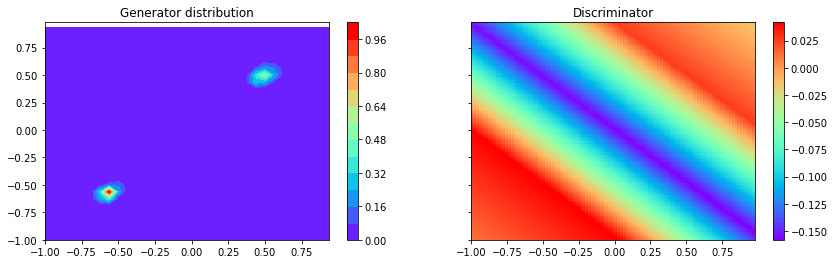

[30/100][999/1000] Loss_D: -0.02771229 Loss_G: -0.0116 D(G(z)): 0.0085


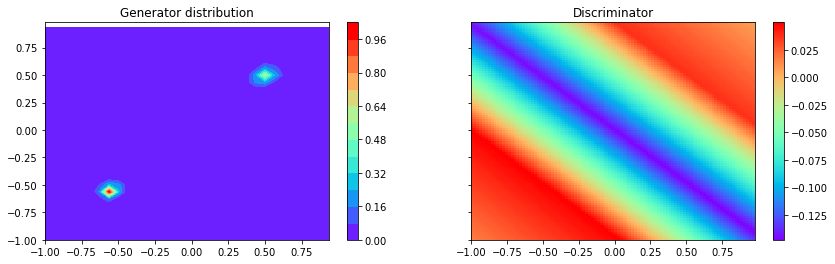

[31/100][999/1000] Loss_D: -0.02149883 Loss_G: -0.0337 D(G(z)): 0.0322


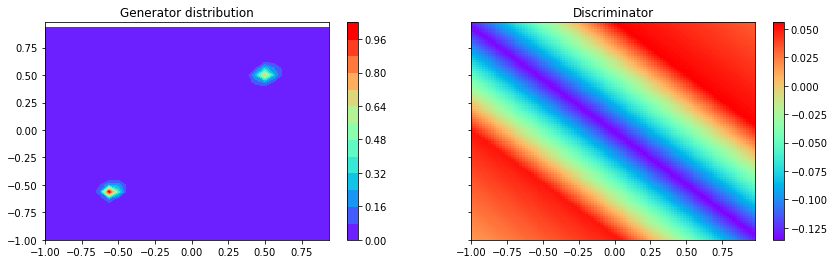

[32/100][999/1000] Loss_D: -0.01668531 Loss_G: -0.0425 D(G(z)): 0.0413


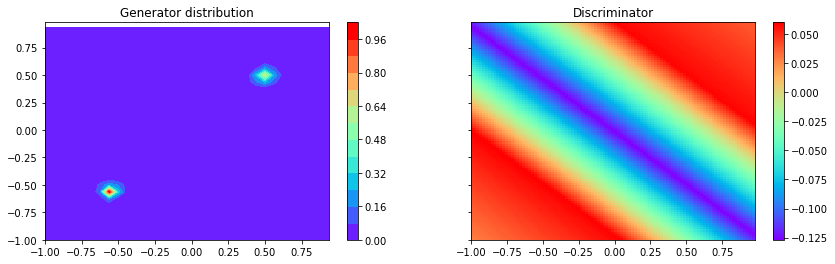

[33/100][999/1000] Loss_D: -0.02090639 Loss_G: -0.0517 D(G(z)): 0.0511


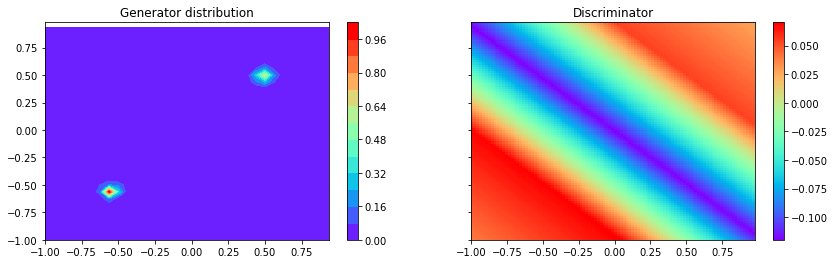

[34/100][999/1000] Loss_D: -0.01499345 Loss_G: -0.0487 D(G(z)): 0.0472


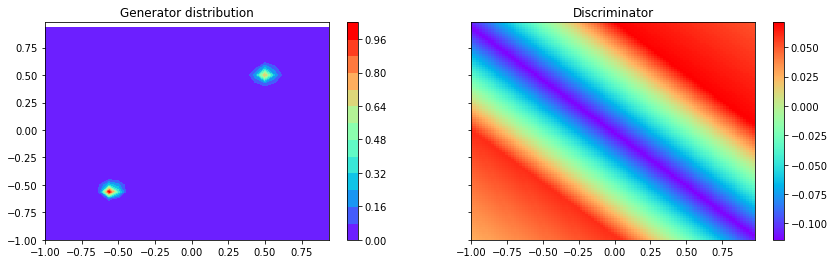

[35/100][999/1000] Loss_D: -0.01740616 Loss_G: -0.0496 D(G(z)): 0.0471


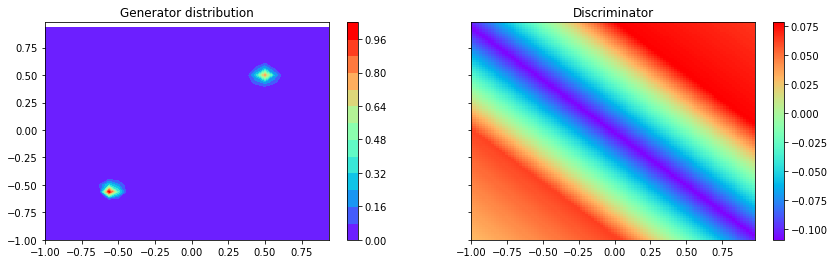

[36/100][999/1000] Loss_D: -0.01884315 Loss_G: -0.0580 D(G(z)): 0.0564


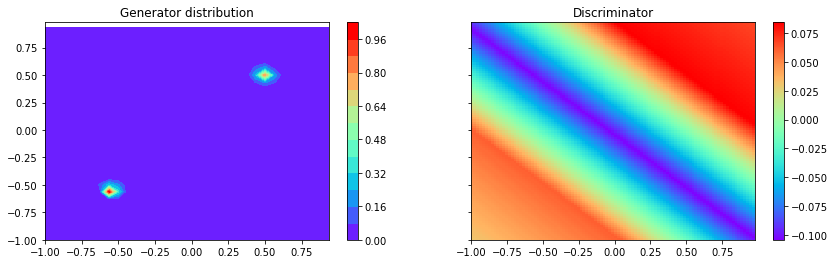

[37/100][999/1000] Loss_D: -0.01743645 Loss_G: -0.0651 D(G(z)): 0.0641


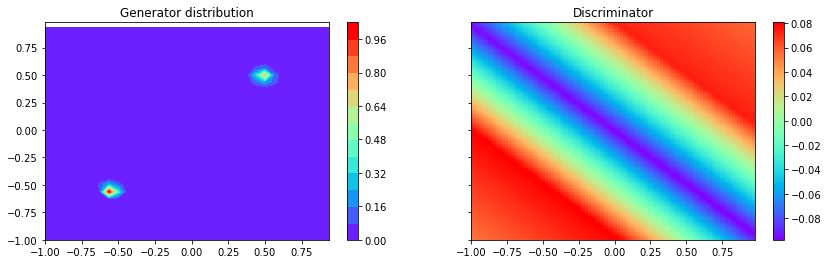

[38/100][999/1000] Loss_D: -0.01336621 Loss_G: -0.0703 D(G(z)): 0.0693


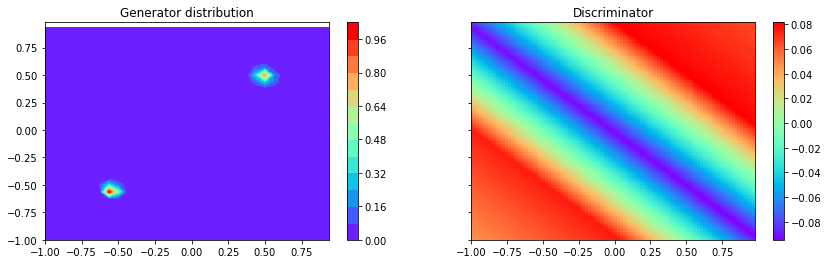

[39/100][999/1000] Loss_D: -0.01294447 Loss_G: -0.0603 D(G(z)): 0.0581


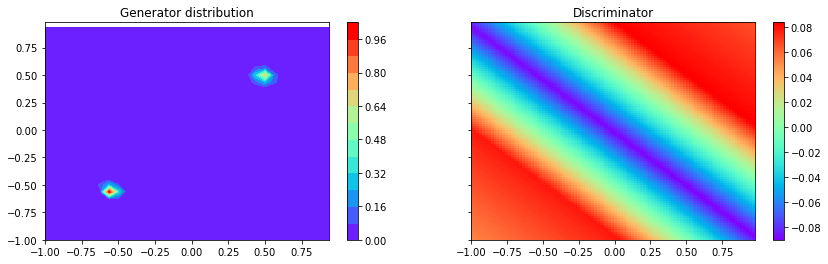

[40/100][999/1000] Loss_D: -0.01140707 Loss_G: -0.0714 D(G(z)): 0.0702


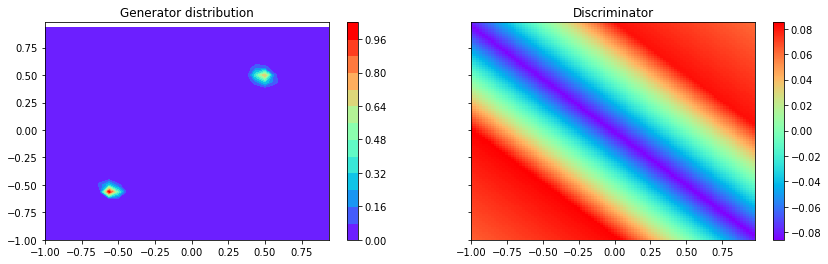

[41/100][999/1000] Loss_D: -0.01111860 Loss_G: -0.0721 D(G(z)): 0.0711


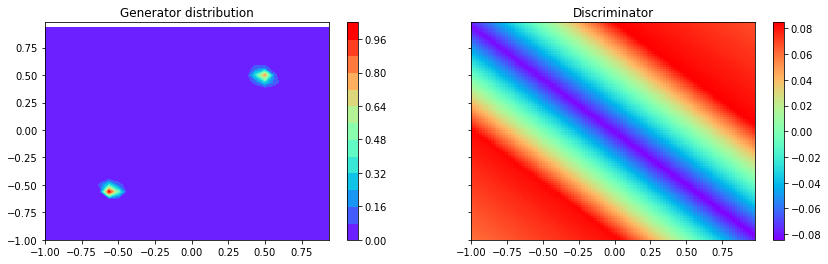

[42/100][999/1000] Loss_D: -0.01431780 Loss_G: -0.0820 D(G(z)): 0.0816


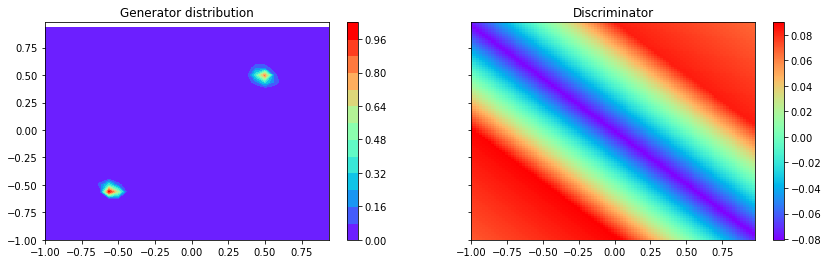

[43/100][999/1000] Loss_D: -0.00929224 Loss_G: -0.0796 D(G(z)): 0.0787


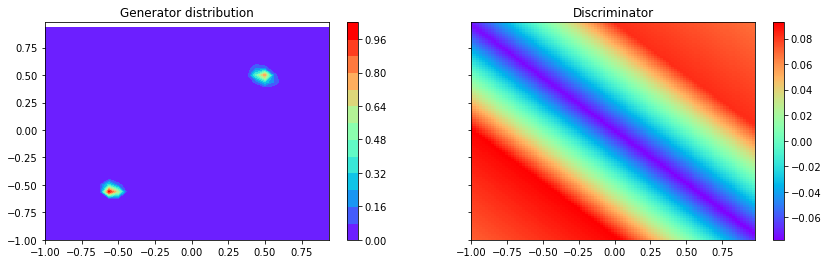

[44/100][999/1000] Loss_D: -0.01703931 Loss_G: -0.0816 D(G(z)): 0.0808


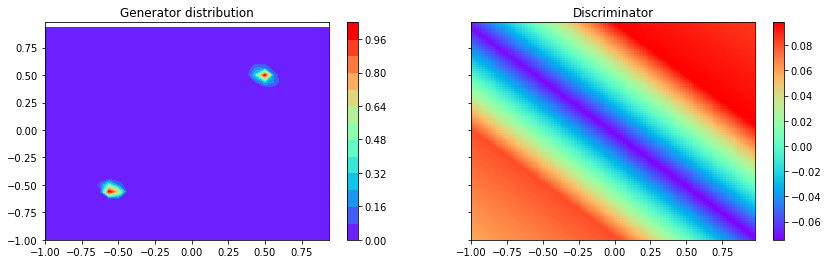

[45/100][999/1000] Loss_D: -0.00773022 Loss_G: -0.0806 D(G(z)): 0.0796


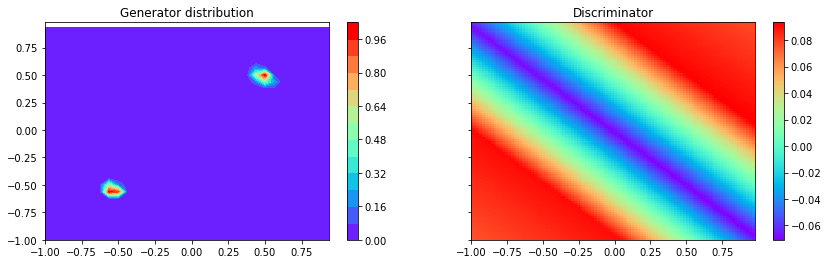

[46/100][999/1000] Loss_D: -0.01088478 Loss_G: -0.0805 D(G(z)): 0.0793


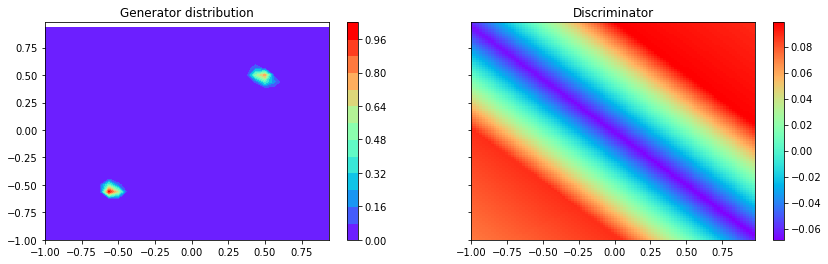

[47/100][999/1000] Loss_D: -0.01444776 Loss_G: -0.0888 D(G(z)): 0.0880


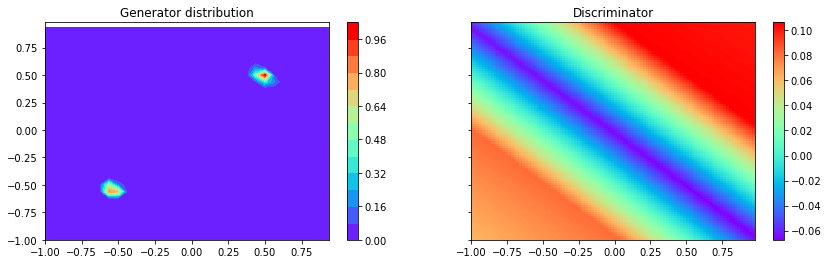

[48/100][999/1000] Loss_D: -0.00783382 Loss_G: -0.0846 D(G(z)): 0.0831


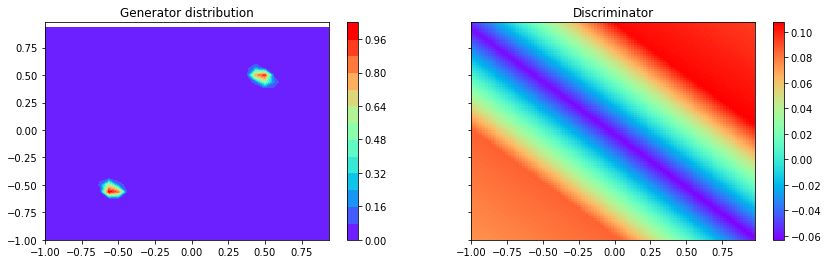

[49/100][999/1000] Loss_D: -0.01430887 Loss_G: -0.0926 D(G(z)): 0.0920


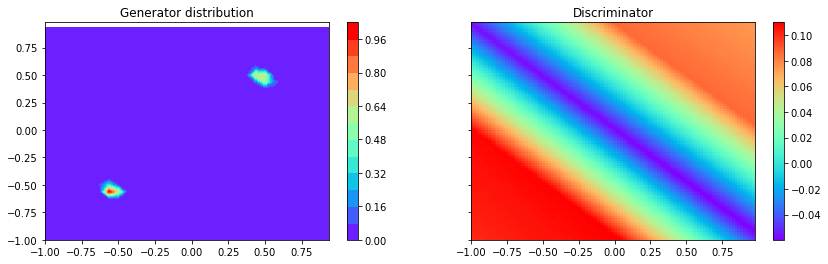

[50/100][999/1000] Loss_D: -0.00454371 Loss_G: -0.0963 D(G(z)): 0.0961


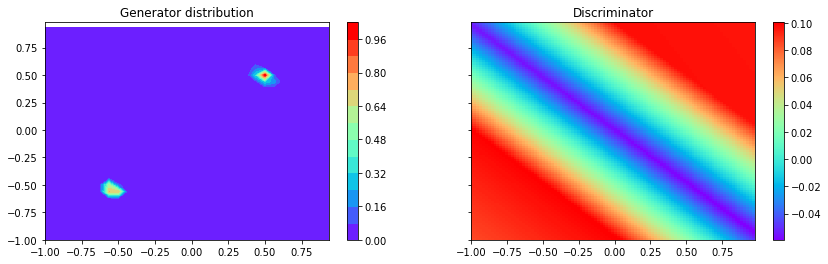

[51/100][999/1000] Loss_D: -0.00361246 Loss_G: -0.0929 D(G(z)): 0.0924


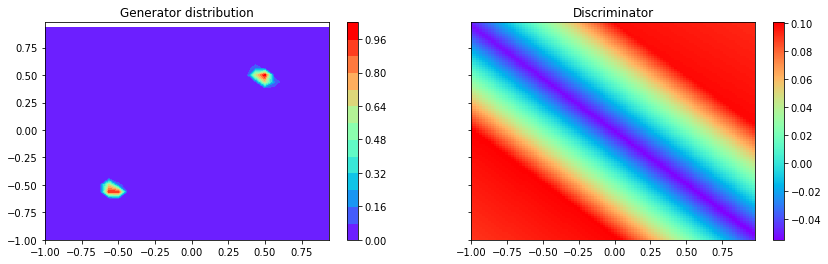

[52/100][999/1000] Loss_D: -0.01141980 Loss_G: -0.0929 D(G(z)): 0.0919


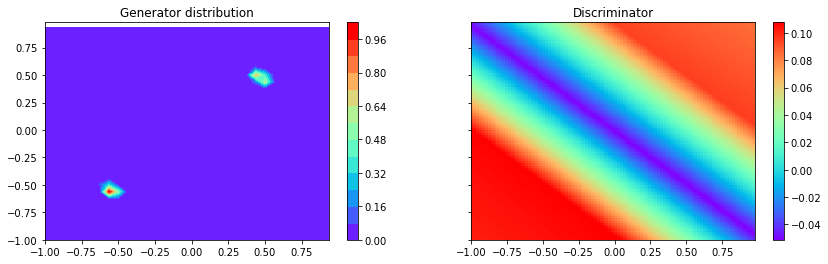

[53/100][999/1000] Loss_D: -0.01506966 Loss_G: -0.0891 D(G(z)): 0.0881


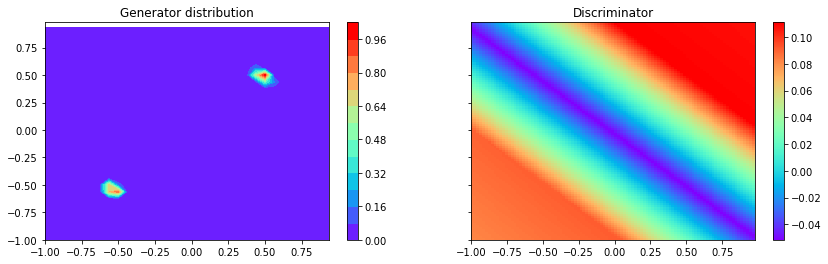

[54/100][999/1000] Loss_D: -0.01028364 Loss_G: -0.0951 D(G(z)): 0.0944


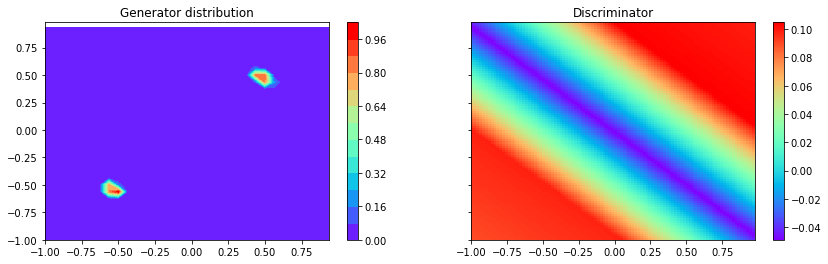

[55/100][999/1000] Loss_D: -0.01273704 Loss_G: -0.1010 D(G(z)): 0.1004


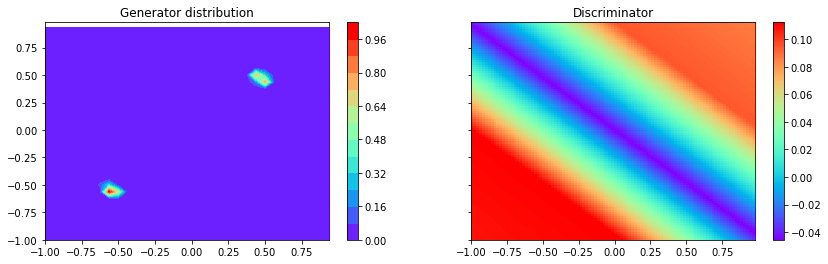

[56/100][999/1000] Loss_D: -0.00507686 Loss_G: -0.0967 D(G(z)): 0.0960


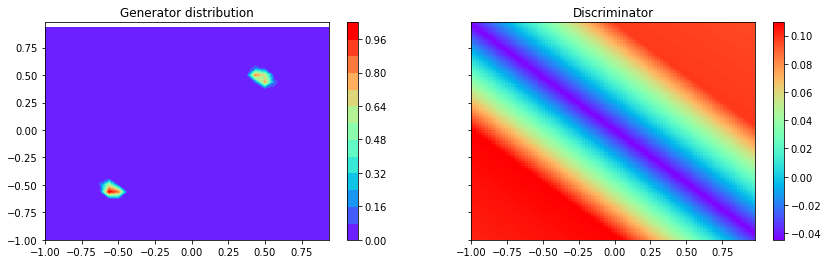

[57/100][999/1000] Loss_D: -0.00831255 Loss_G: -0.0974 D(G(z)): 0.0971


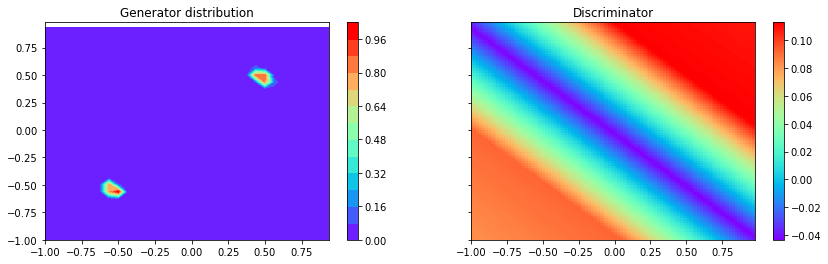

[58/100][999/1000] Loss_D: -0.00776146 Loss_G: -0.0946 D(G(z)): 0.0934


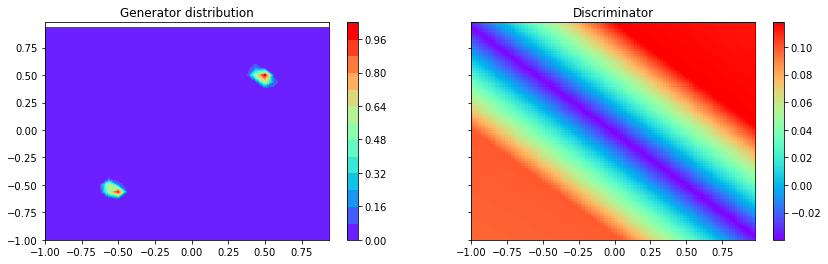

[59/100][999/1000] Loss_D: -0.00534996 Loss_G: -0.1019 D(G(z)): 0.1005


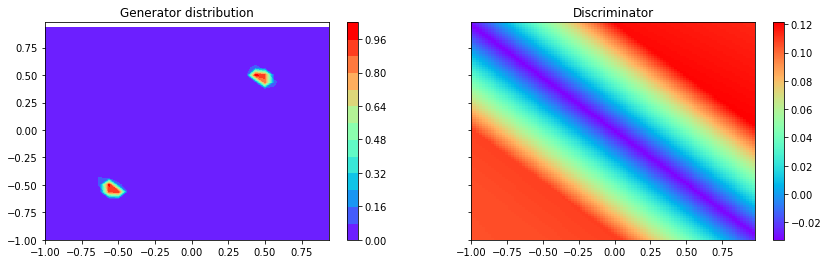

[60/100][999/1000] Loss_D: -0.00789784 Loss_G: -0.1109 D(G(z)): 0.1098


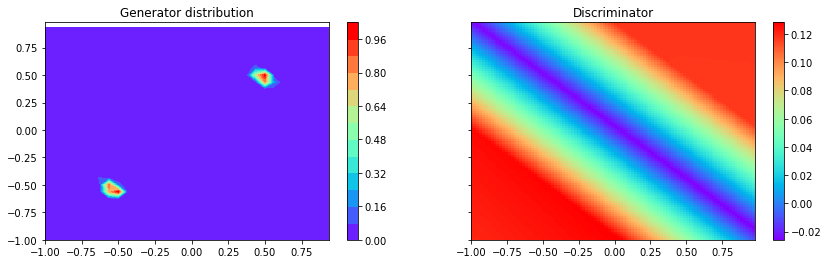

[61/100][999/1000] Loss_D: -0.01636204 Loss_G: -0.1223 D(G(z)): 0.1220


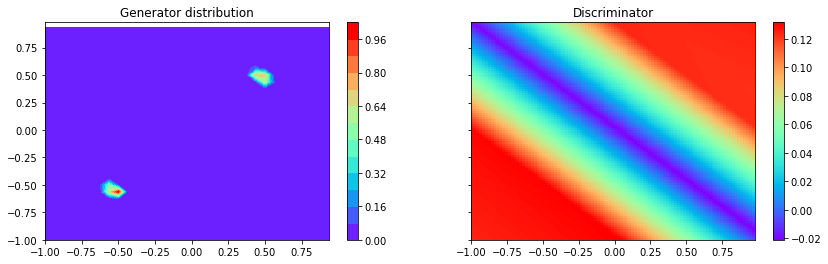

KeyboardInterrupt: 

In [56]:
for epoch in range(1, niter + 1):
    GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)
    for i in range(nElements):
        ############################
        # (1) Update D network
        ###########################
        # train with real
        for t in range(n_critic):
            netD.zero_grad()
            
            ## Real 
            real_cpu = GMutils.sample(batchSize)
            batch_size = real_cpu.size(0)
            input.data.resize_(real_cpu.size()).copy_(real_cpu)
            
            output_real = netD(input)
            
            ## Fake
            noise.data.resize_(batch_size, nz)
            noise.data.normal_(0, 1)
            fake = netG(noise).detach()
            
            output_fake = netD(fake)
            
            errD = - torch.mean(output_real) + torch.mean(output_fake)
            errD.backward()
            optimizerD.step()
                        
            # Clip
            for p in netD.parameters():
                if not np.isnan(p.data.std()):
                    p.data.add_(- p.data.mean()).div_(p.data.std() + 1e-5).mul_(c)
                
        ############################
        # (2) Update G network
        ###########################
        
        netG.zero_grad()
        noise.data.normal_(0, 1)
        fake = netG(noise)
        output = netD(fake)
        errG = - torch.mean(output) - output.data.var()
        errG.backward()
        
        D_G_z2 = output.data.mean()
        
        optimizerG.step()
        
    print('[%d/%d][%d/%d] Loss_D: %.8f Loss_G: %.4f D(G(z)): %.4f'
              % (epoch, niter, i, nElements,
                 errD.data.sum(), errG.data[0], D_G_z2))
            
GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)